# Models Comparison for TinyML

In [27]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [28]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)
tasks = ["2Labels", "3Labels", "4Labels", "5Labels"]
# Change this to change subtask
taskIndex = 1

In [29]:
with open('data/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [30]:
n_labels = 2 + taskIndex
samples = 100
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [31]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [32]:
y = np.array([int(el) for el in y])
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test.shape)
print(y_test.shape)


(60, 42)
(60,)


In [34]:
X_test

array([[ 0.04, -0.03,  0.96,  0.02,  0.03,  0.95,  0.07, -0.01,  1.1 ,
         0.12, -0.13,  1.08,  0.22, -0.01,  0.69,  0.26, -0.06,  0.87,
         0.13,  0.06,  1.02,  0.09,  0.12,  1.04,  0.03, -0.  ,  1.03,
         0.04,  0.02,  0.99,  0.06,  0.04,  0.98,  0.04,  0.  ,  0.96,
         0.06,  0.02,  0.97,  0.05,  0.02,  0.98],
       [ 0.08, -0.09,  0.99,  0.13, -0.04,  0.92,  0.09,  0.03,  1.03,
         0.12, -0.11,  1.11,  0.14, -0.05,  0.96,  0.23, -0.02,  0.79,
         0.15,  0.06,  0.98,  0.14,  0.09,  1.02,  0.09, -0.05,  0.99,
         0.08, -0.09,  1.  ,  0.08, -0.03,  0.99,  0.1 , -0.01,  0.98,
         0.11, -0.01,  0.97,  0.1 , -0.03,  0.96],
       [ 0.07, -0.04,  1.  ,  0.05, -0.03,  0.97,  0.11, -0.02,  1.21,
         0.13, -0.06,  0.83,  0.13, -0.  ,  0.8 ,  0.15,  0.09,  1.01,
         0.03, -0.03,  1.16,  0.09, -0.05,  0.97,  0.13,  0.01,  0.82,
         0.14,  0.13,  0.98,  0.09,  0.08,  1.05,  0.05, -0.12,  0.98,
         0.12,  0.  ,  0.96,  0.08, -0.03,  0.

In [35]:
y_test

array([0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1])

## Model Spotting

In [36]:
# Test options and evaluation metric
num_folds = 5
seed = 42
scoring = 'f1_macro'

In [37]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.99, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=100, 
                                                           max_features=5, criterion='gini', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1)))


In [38]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,93 0,02
LR - 0,93 0,06
CART - 0,82 0,06
SVC - 0,96 0,03
RF - 0,96 0,02


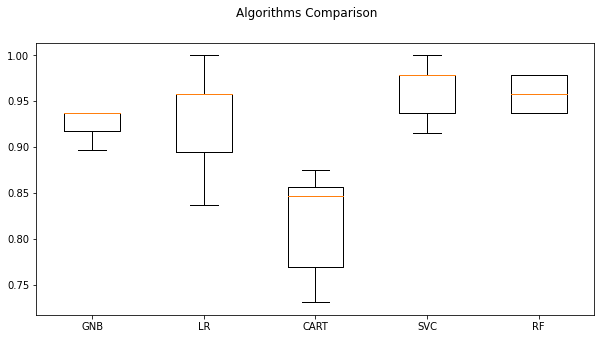

In [20]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [21]:
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2] if taskIndex > 1 else row[-3]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = labels[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[taskIndex] + "/classificationReports/" +'report' + model_name +  '.csv', index = False)
    
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    #classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      0.95      0.97        20
           2       0.91      1.00      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       1.00      0.85      0.92        20
           2       0.95      1.00      0.98        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

-------------------------------------------------------------
Model CART: 
              precision    recall  f1-score   support

           0       0.75

# Neural Network

In [22]:
#Hyperparameters of NN
EPOCHS = 500 
BATCH_SIZE = 7
learn_rate = 0.001
nodes = 256
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))    
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [23]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                1806      
_________________________________________________________________
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               11008     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 13,585
Trainable params: 13,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [==============================] - 0s 611us/step - loss: 1.0872 - accuracy: 0.4219
Epoch 2/500
28

28/28 [==============================] - 0s 566us/step - loss: 0.0515 - accuracy: 0.9844
Epoch 72/500
28/28 [==============================] - 0s 580us/step - loss: 0.0688 - accuracy: 0.9688
Epoch 73/500
28/28 [==============================] - 0s 590us/step - loss: 0.1152 - accuracy: 0.9635
Epoch 74/500
28/28 [==============================] - 0s 565us/step - loss: 0.0708 - accuracy: 0.9844
Epoch 75/500
28/28 [==============================] - 0s 549us/step - loss: 0.0592 - accuracy: 0.9792
Epoch 76/500
28/28 [==============================] - 0s 572us/step - loss: 0.0704 - accuracy: 0.9792
Epoch 77/500
28/28 [==============================] - 0s 558us/step - loss: 0.0639 - accuracy: 0.9896
Epoch 78/500
28/28 [==============================] - 0s 520us/step - loss: 0.0327 - accuracy: 0.9948
Epoch 79/500
28/28 [==============================] - 0s 538us/step - loss: 0.0316 - accuracy: 0.9896
Epoch 80/500
28/28 [==============================] - 0s 579us/step - loss: 0.0674 - accuracy: 

Epoch 151/500
28/28 [==============================] - 0s 540us/step - loss: 0.0363 - accuracy: 0.9896
Epoch 152/500
28/28 [==============================] - 0s 535us/step - loss: 0.0270 - accuracy: 0.9896
Epoch 153/500
28/28 [==============================] - 0s 538us/step - loss: 0.0301 - accuracy: 0.9896
Epoch 154/500
28/28 [==============================] - 0s 520us/step - loss: 0.0485 - accuracy: 0.9792
Epoch 155/500
28/28 [==============================] - 0s 536us/step - loss: 0.0492 - accuracy: 0.9896
Epoch 156/500
28/28 [==============================] - 0s 547us/step - loss: 0.0341 - accuracy: 0.9844
Epoch 157/500
28/28 [==============================] - 0s 538us/step - loss: 0.0397 - accuracy: 0.9896
Epoch 158/500
28/28 [==============================] - 0s 531us/step - loss: 0.0612 - accuracy: 0.9792
Epoch 159/500
28/28 [==============================] - 0s 539us/step - loss: 0.0380 - accuracy: 0.9792
Epoch 160/500
28/28 [==============================] - 0s 534us/step - lo

28/28 [==============================] - 0s 532us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 231/500
28/28 [==============================] - 0s 569us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 232/500
28/28 [==============================] - 0s 535us/step - loss: 0.0318 - accuracy: 0.9844
Epoch 233/500
28/28 [==============================] - 0s 589us/step - loss: 0.0457 - accuracy: 0.9844
Epoch 234/500
28/28 [==============================] - 0s 559us/step - loss: 0.0331 - accuracy: 0.9896
Epoch 235/500
28/28 [==============================] - 0s 533us/step - loss: 0.0468 - accuracy: 0.9792
Epoch 236/500
28/28 [==============================] - 0s 545us/step - loss: 0.0212 - accuracy: 0.9948
Epoch 237/500
28/28 [==============================] - 0s 530us/step - loss: 0.0124 - accuracy: 1.0000
Epoch 238/500
28/28 [==============================] - 0s 529us/step - loss: 0.0184 - accuracy: 0.9948
Epoch 239/500
28/28 [==============================] - 0s 537us/step - loss: 0.0275 - a

28/28 [==============================] - 0s 534us/step - loss: 0.0115 - accuracy: 0.9948
Epoch 310/500
28/28 [==============================] - 0s 539us/step - loss: 0.0132 - accuracy: 0.9948
Epoch 311/500
28/28 [==============================] - 0s 571us/step - loss: 0.0157 - accuracy: 0.9948
Epoch 312/500
28/28 [==============================] - 0s 518us/step - loss: 0.0158 - accuracy: 0.9948
Epoch 313/500
28/28 [==============================] - 0s 535us/step - loss: 0.0238 - accuracy: 0.9844
Epoch 314/500
28/28 [==============================] - 0s 538us/step - loss: 0.0221 - accuracy: 0.9896
Epoch 315/500
28/28 [==============================] - 0s 545us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 316/500
28/28 [==============================] - 0s 548us/step - loss: 0.0047 - accuracy: 0.9948
Epoch 317/500
28/28 [==============================] - 0s 539us/step - loss: 0.0346 - accuracy: 0.9844
Epoch 318/500
28/28 [==============================] - 0s 538us/step - loss: 0.0263 - a

28/28 [==============================] - 0s 542us/step - loss: 0.0242 - accuracy: 0.9896
Epoch 389/500
28/28 [==============================] - 0s 536us/step - loss: 0.0420 - accuracy: 0.9948
Epoch 390/500
28/28 [==============================] - 0s 557us/step - loss: 0.0152 - accuracy: 0.9948
Epoch 391/500
28/28 [==============================] - 0s 557us/step - loss: 0.0225 - accuracy: 0.9896
Epoch 392/500
28/28 [==============================] - 0s 544us/step - loss: 0.0512 - accuracy: 0.9792
Epoch 393/500
28/28 [==============================] - 0s 542us/step - loss: 0.0222 - accuracy: 0.9948
Epoch 394/500
28/28 [==============================] - 0s 548us/step - loss: 0.0242 - accuracy: 0.9948
Epoch 395/500
28/28 [==============================] - 0s 552us/step - loss: 0.0285 - accuracy: 0.9844
Epoch 396/500
28/28 [==============================] - 0s 523us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 397/500
28/28 [==============================] - 0s 571us/step - loss: 0.0338 - a

28/28 [==============================] - 0s 562us/step - loss: 0.0087 - accuracy: 0.9948
Epoch 468/500
28/28 [==============================] - 0s 542us/step - loss: 0.0072 - accuracy: 0.9948
Epoch 469/500
28/28 [==============================] - 0s 555us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 470/500
28/28 [==============================] - 0s 576us/step - loss: 0.0148 - accuracy: 0.9896
Epoch 471/500
28/28 [==============================] - 0s 547us/step - loss: 0.0309 - accuracy: 0.9896
Epoch 472/500
28/28 [==============================] - 0s 532us/step - loss: 0.1193 - accuracy: 0.9583
Epoch 473/500
28/28 [==============================] - 0s 537us/step - loss: 0.0131 - accuracy: 0.9948
Epoch 474/500
28/28 [==============================] - 0s 613us/step - loss: 0.0110 - accuracy: 0.9948
Epoch 475/500
28/28 [==============================] - 0s 560us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 476/500
28/28 [==============================] - 0s 525us/step - loss: 0.0267 - a

28/28 [==============================] - 0s 565us/step - loss: 0.0996 - accuracy: 0.9740
Epoch 38/500
28/28 [==============================] - 0s 577us/step - loss: 0.1099 - accuracy: 0.9792
Epoch 39/500
28/28 [==============================] - 0s 559us/step - loss: 0.1053 - accuracy: 0.9635
Epoch 40/500
28/28 [==============================] - 0s 517us/step - loss: 0.1014 - accuracy: 0.9688
Epoch 41/500
28/28 [==============================] - 0s 564us/step - loss: 0.1190 - accuracy: 0.9740
Epoch 42/500
28/28 [==============================] - 0s 582us/step - loss: 0.0967 - accuracy: 0.9635
Epoch 43/500
28/28 [==============================] - 0s 548us/step - loss: 0.0726 - accuracy: 0.9844
Epoch 44/500
28/28 [==============================] - 0s 584us/step - loss: 0.0819 - accuracy: 0.9688
Epoch 45/500
28/28 [==============================] - 0s 547us/step - loss: 0.0999 - accuracy: 0.9583
Epoch 46/500
28/28 [==============================] - 0s 558us/step - loss: 0.0840 - accuracy: 

28/28 [==============================] - 0s 689us/step - loss: 0.0140 - accuracy: 0.9948
Epoch 118/500
28/28 [==============================] - 0s 685us/step - loss: 0.0272 - accuracy: 0.9948
Epoch 119/500
28/28 [==============================] - 0s 628us/step - loss: 0.0380 - accuracy: 0.9896
Epoch 120/500
28/28 [==============================] - 0s 631us/step - loss: 0.0295 - accuracy: 0.9896
Epoch 121/500
28/28 [==============================] - 0s 652us/step - loss: 0.0202 - accuracy: 0.9948
Epoch 122/500
28/28 [==============================] - 0s 664us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 123/500
28/28 [==============================] - 0s 667us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 124/500
28/28 [==============================] - 0s 656us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 125/500
28/28 [==============================] - 0s 666us/step - loss: 0.0132 - accuracy: 0.9948
Epoch 126/500
28/28 [==============================] - 0s 688us/step - loss: 0.0222 - a

28/28 [==============================] - 0s 650us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 197/500
28/28 [==============================] - 0s 639us/step - loss: 0.0094 - accuracy: 0.9948
Epoch 198/500
28/28 [==============================] - 0s 621us/step - loss: 0.0117 - accuracy: 0.9948
Epoch 199/500
28/28 [==============================] - 0s 628us/step - loss: 0.0121 - accuracy: 0.9948
Epoch 200/500
28/28 [==============================] - 0s 646us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 201/500
28/28 [==============================] - 0s 632us/step - loss: 0.0241 - accuracy: 0.9844
Epoch 202/500
28/28 [==============================] - 0s 640us/step - loss: 0.0187 - accuracy: 0.9948
Epoch 203/500
28/28 [==============================] - 0s 638us/step - loss: 0.0383 - accuracy: 0.9896
Epoch 204/500
28/28 [==============================] - 0s 632us/step - loss: 0.0149 - accuracy: 0.9948
Epoch 205/500
28/28 [==============================] - 0s 606us/step - loss: 0.0169 - a

28/28 [==============================] - 0s 620us/step - loss: 0.0095 - accuracy: 0.9948
Epoch 276/500
28/28 [==============================] - 0s 628us/step - loss: 0.0292 - accuracy: 0.9844
Epoch 277/500
28/28 [==============================] - 0s 634us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 278/500
28/28 [==============================] - 0s 601us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 279/500
28/28 [==============================] - 0s 662us/step - loss: 0.0102 - accuracy: 0.9948
Epoch 280/500
28/28 [==============================] - 0s 663us/step - loss: 0.0323 - accuracy: 0.9948
Epoch 281/500
28/28 [==============================] - 0s 624us/step - loss: 0.0247 - accuracy: 0.9896
Epoch 282/500
28/28 [==============================] - 0s 630us/step - loss: 0.0276 - accuracy: 0.9948
Epoch 283/500
28/28 [==============================] - 0s 625us/step - loss: 0.0192 - accuracy: 0.9948
Epoch 284/500
28/28 [==============================] - 0s 626us/step - loss: 0.0081 - a

28/28 [==============================] - 0s 637us/step - loss: 0.0528 - accuracy: 0.9844
Epoch 355/500
28/28 [==============================] - 0s 626us/step - loss: 0.0152 - accuracy: 0.9948
Epoch 356/500
28/28 [==============================] - 0s 639us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 357/500
28/28 [==============================] - 0s 634us/step - loss: 0.0271 - accuracy: 0.9948
Epoch 358/500
28/28 [==============================] - 0s 628us/step - loss: 0.0095 - accuracy: 0.9896
Epoch 359/500
28/28 [==============================] - 0s 616us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 360/500
28/28 [==============================] - 0s 651us/step - loss: 0.0172 - accuracy: 0.9896
Epoch 361/500
28/28 [==============================] - 0s 640us/step - loss: 0.0191 - accuracy: 0.9844
Epoch 362/500
28/28 [==============================] - 0s 634us/step - loss: 0.0608 - accuracy: 0.9844
Epoch 363/500
28/28 [==============================] - 0s 616us/step - loss: 0.0043 - a

28/28 [==============================] - 0s 623us/step - loss: 0.0165 - accuracy: 0.9896
Epoch 434/500
28/28 [==============================] - 0s 642us/step - loss: 0.0791 - accuracy: 0.9792
Epoch 435/500
28/28 [==============================] - 0s 622us/step - loss: 0.0115 - accuracy: 0.9948
Epoch 436/500
28/28 [==============================] - 0s 646us/step - loss: 0.0187 - accuracy: 0.9896
Epoch 437/500
28/28 [==============================] - 0s 651us/step - loss: 0.0227 - accuracy: 0.9948
Epoch 438/500
28/28 [==============================] - 0s 656us/step - loss: 0.0234 - accuracy: 0.9896
Epoch 439/500
28/28 [==============================] - 0s 642us/step - loss: 0.0195 - accuracy: 0.9844
Epoch 440/500
28/28 [==============================] - 0s 670us/step - loss: 0.0330 - accuracy: 0.9844
Epoch 441/500
28/28 [==============================] - 0s 646us/step - loss: 0.0187 - accuracy: 0.9896
Epoch 442/500
28/28 [==============================] - 0s 671us/step - loss: 0.0017 - a

28/28 [==============================] - 0s 740us/step - loss: 1.0750 - accuracy: 0.3854
Epoch 3/500
28/28 [==============================] - 0s 694us/step - loss: 0.9764 - accuracy: 0.5208
Epoch 4/500
28/28 [==============================] - 0s 754us/step - loss: 0.9246 - accuracy: 0.6042
Epoch 5/500
28/28 [==============================] - 0s 697us/step - loss: 0.8142 - accuracy: 0.7188
Epoch 6/500
28/28 [==============================] - 0s 673us/step - loss: 0.7085 - accuracy: 0.7396
Epoch 7/500
28/28 [==============================] - 0s 630us/step - loss: 0.5685 - accuracy: 0.8490
Epoch 8/500
28/28 [==============================] - 0s 696us/step - loss: 0.5270 - accuracy: 0.8229
Epoch 9/500
28/28 [==============================] - 0s 672us/step - loss: 0.4492 - accuracy: 0.8750
Epoch 10/500
28/28 [==============================] - 0s 651us/step - loss: 0.4464 - accuracy: 0.8333
Epoch 11/500
28/28 [==============================] - 0s 640us/step - loss: 0.3618 - accuracy: 0.8958


28/28 [==============================] - 0s 623us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 83/500
28/28 [==============================] - 0s 656us/step - loss: 0.0418 - accuracy: 0.9792
Epoch 84/500
28/28 [==============================] - 0s 623us/step - loss: 0.0234 - accuracy: 1.0000
Epoch 85/500
28/28 [==============================] - 0s 693us/step - loss: 0.0274 - accuracy: 0.9948
Epoch 86/500
28/28 [==============================] - 0s 651us/step - loss: 0.0129 - accuracy: 1.0000
Epoch 87/500
28/28 [==============================] - 0s 637us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 88/500
28/28 [==============================] - 0s 637us/step - loss: 0.0209 - accuracy: 0.9948
Epoch 89/500
28/28 [==============================] - 0s 638us/step - loss: 0.0273 - accuracy: 0.9896
Epoch 90/500
28/28 [==============================] - 0s 676us/step - loss: 0.0341 - accuracy: 0.9896
Epoch 91/500
28/28 [==============================] - 0s 644us/step - loss: 0.0463 - accuracy: 

28/28 [==============================] - 0s 619us/step - loss: 0.0150 - accuracy: 0.9948
Epoch 162/500
28/28 [==============================] - 0s 674us/step - loss: 0.0188 - accuracy: 0.9948
Epoch 163/500
28/28 [==============================] - 0s 634us/step - loss: 0.0087 - accuracy: 0.9948
Epoch 164/500
28/28 [==============================] - 0s 636us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 165/500
28/28 [==============================] - 0s 626us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 166/500
28/28 [==============================] - 0s 632us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 167/500
28/28 [==============================] - 0s 666us/step - loss: 0.0132 - accuracy: 0.9896
Epoch 168/500
28/28 [==============================] - 0s 655us/step - loss: 0.0163 - accuracy: 0.9948
Epoch 169/500
28/28 [==============================] - 0s 635us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 170/500
28/28 [==============================] - 0s 623us/step - loss: 0.0230 - a

28/28 [==============================] - 0s 665us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 241/500
28/28 [==============================] - 0s 659us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 242/500
28/28 [==============================] - 0s 655us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 243/500
28/28 [==============================] - 0s 661us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 244/500
28/28 [==============================] - 0s 652us/step - loss: 3.4888e-04 - accuracy: 1.0000
Epoch 245/500
28/28 [==============================] - 0s 657us/step - loss: 0.0087 - accuracy: 0.9948
Epoch 246/500
28/28 [==============================] - 0s 652us/step - loss: 0.0048 - accuracy: 0.9948
Epoch 247/500
28/28 [==============================] - 0s 649us/step - loss: 0.0591 - accuracy: 0.9792
Epoch 248/500
28/28 [==============================] - 0s 662us/step - loss: 0.0764 - accuracy: 0.9635
Epoch 249/500
28/28 [==============================] - 0s 702us/step - loss: 0.0549

28/28 [==============================] - 0s 682us/step - loss: 0.0354 - accuracy: 0.9844
Epoch 320/500
28/28 [==============================] - 0s 688us/step - loss: 0.0133 - accuracy: 0.9948
Epoch 321/500
28/28 [==============================] - 0s 725us/step - loss: 0.0250 - accuracy: 0.9896
Epoch 322/500
28/28 [==============================] - 0s 662us/step - loss: 0.0098 - accuracy: 0.9948
Epoch 323/500
28/28 [==============================] - 0s 628us/step - loss: 0.0160 - accuracy: 0.9948
Epoch 324/500
28/28 [==============================] - 0s 667us/step - loss: 0.0114 - accuracy: 0.9948
Epoch 325/500
28/28 [==============================] - 0s 687us/step - loss: 0.0127 - accuracy: 0.9948
Epoch 326/500
28/28 [==============================] - 0s 659us/step - loss: 0.0164 - accuracy: 0.9896
Epoch 327/500
28/28 [==============================] - 0s 653us/step - loss: 0.0069 - accuracy: 0.9948
Epoch 328/500
28/28 [==============================] - 0s 657us/step - loss: 0.0076 - a

28/28 [==============================] - 0s 626us/step - loss: 0.0358 - accuracy: 0.9844
Epoch 399/500
28/28 [==============================] - 0s 698us/step - loss: 0.0291 - accuracy: 0.9792
Epoch 400/500
28/28 [==============================] - 0s 676us/step - loss: 0.0153 - accuracy: 0.9948
Epoch 401/500
28/28 [==============================] - 0s 654us/step - loss: 0.0587 - accuracy: 0.9792
Epoch 402/500
28/28 [==============================] - 0s 641us/step - loss: 0.0258 - accuracy: 0.9896
Epoch 403/500
28/28 [==============================] - 0s 649us/step - loss: 0.0154 - accuracy: 0.9948
Epoch 404/500
28/28 [==============================] - 0s 631us/step - loss: 0.0168 - accuracy: 0.9948
Epoch 405/500
28/28 [==============================] - 0s 654us/step - loss: 0.0150 - accuracy: 0.9948
Epoch 406/500
28/28 [==============================] - 0s 620us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 407/500
28/28 [==============================] - 0s 664us/step - loss: 0.0051 - a

28/28 [==============================] - 0s 704us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 478/500
28/28 [==============================] - 0s 641us/step - loss: 9.5393e-04 - accuracy: 1.0000
Epoch 479/500
28/28 [==============================] - 0s 650us/step - loss: 4.9108e-04 - accuracy: 1.0000
Epoch 480/500
28/28 [==============================] - 0s 640us/step - loss: 0.0386 - accuracy: 0.9844
Epoch 481/500
28/28 [==============================] - 0s 689us/step - loss: 0.0570 - accuracy: 0.9792
Epoch 482/500
28/28 [==============================] - 0s 658us/step - loss: 0.0254 - accuracy: 0.9844
Epoch 483/500
28/28 [==============================] - 0s 662us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 484/500
28/28 [==============================] - 0s 705us/step - loss: 0.0125 - accuracy: 0.9948
Epoch 485/500
28/28 [==============================] - 0s 671us/step - loss: 0.0291 - accuracy: 0.9896
Epoch 486/500
28/28 [==============================] - 0s 673us/step - loss: 0.

28/28 [==============================] - 0s 673us/step - loss: 0.0947 - accuracy: 0.9792
Epoch 48/500
28/28 [==============================] - 0s 659us/step - loss: 0.1099 - accuracy: 0.9635
Epoch 49/500
28/28 [==============================] - 0s 687us/step - loss: 0.0964 - accuracy: 0.9635
Epoch 50/500
28/28 [==============================] - 0s 662us/step - loss: 0.1063 - accuracy: 0.9635
Epoch 51/500
28/28 [==============================] - 0s 663us/step - loss: 0.1024 - accuracy: 0.9844
Epoch 52/500
28/28 [==============================] - 0s 645us/step - loss: 0.0676 - accuracy: 0.9844
Epoch 53/500
28/28 [==============================] - 0s 647us/step - loss: 0.0742 - accuracy: 0.9844
Epoch 54/500
28/28 [==============================] - 0s 649us/step - loss: 0.0839 - accuracy: 0.9792
Epoch 55/500
28/28 [==============================] - 0s 650us/step - loss: 0.0965 - accuracy: 0.9792
Epoch 56/500
28/28 [==============================] - 0s 644us/step - loss: 0.0675 - accuracy: 

28/28 [==============================] - 0s 711us/step - loss: 0.0303 - accuracy: 0.9896
Epoch 128/500
28/28 [==============================] - 0s 654us/step - loss: 0.0196 - accuracy: 0.9896
Epoch 129/500
28/28 [==============================] - 0s 636us/step - loss: 0.0198 - accuracy: 0.9896
Epoch 130/500
28/28 [==============================] - 0s 654us/step - loss: 0.0123 - accuracy: 1.0000
Epoch 131/500
28/28 [==============================] - 0s 629us/step - loss: 0.0235 - accuracy: 0.9948
Epoch 132/500
28/28 [==============================] - 0s 649us/step - loss: 0.0182 - accuracy: 0.9896
Epoch 133/500
28/28 [==============================] - 0s 624us/step - loss: 0.0268 - accuracy: 0.9896
Epoch 134/500
28/28 [==============================] - 0s 609us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 135/500
28/28 [==============================] - 0s 664us/step - loss: 0.0153 - accuracy: 0.9948
Epoch 136/500
28/28 [==============================] - 0s 634us/step - loss: 0.0276 - a

28/28 [==============================] - 0s 614us/step - loss: 0.0149 - accuracy: 0.9896
Epoch 207/500
28/28 [==============================] - 0s 635us/step - loss: 0.0284 - accuracy: 0.9948
Epoch 208/500
28/28 [==============================] - 0s 638us/step - loss: 0.0141 - accuracy: 0.9896
Epoch 209/500
28/28 [==============================] - 0s 597us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 210/500
28/28 [==============================] - 0s 631us/step - loss: 0.0103 - accuracy: 0.9948
Epoch 211/500
28/28 [==============================] - 0s 630us/step - loss: 0.0142 - accuracy: 0.9948
Epoch 212/500
28/28 [==============================] - 0s 640us/step - loss: 0.0251 - accuracy: 0.9844
Epoch 213/500
28/28 [==============================] - 0s 633us/step - loss: 0.0268 - accuracy: 0.9896
Epoch 214/500
28/28 [==============================] - 0s 634us/step - loss: 0.0311 - accuracy: 0.9896
Epoch 215/500
28/28 [==============================] - 0s 637us/step - loss: 0.0182 - a

28/28 [==============================] - 0s 635us/step - loss: 0.0181 - accuracy: 0.9948
Epoch 286/500
28/28 [==============================] - 0s 650us/step - loss: 0.0184 - accuracy: 0.9948
Epoch 287/500
28/28 [==============================] - 0s 641us/step - loss: 0.0144 - accuracy: 0.9948
Epoch 288/500
28/28 [==============================] - 0s 646us/step - loss: 0.0660 - accuracy: 0.9688
Epoch 289/500
28/28 [==============================] - 0s 634us/step - loss: 0.0258 - accuracy: 0.9948
Epoch 290/500
28/28 [==============================] - 0s 613us/step - loss: 0.0411 - accuracy: 0.9896
Epoch 291/500
28/28 [==============================] - 0s 648us/step - loss: 0.0306 - accuracy: 0.9844
Epoch 292/500
28/28 [==============================] - 0s 638us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 293/500
28/28 [==============================] - 0s 600us/step - loss: 0.0122 - accuracy: 0.9948
Epoch 294/500
28/28 [==============================] - 0s 616us/step - loss: 0.0067 - a

28/28 [==============================] - 0s 635us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 365/500
28/28 [==============================] - 0s 643us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 366/500
28/28 [==============================] - 0s 627us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 367/500
28/28 [==============================] - 0s 644us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 368/500
28/28 [==============================] - 0s 634us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 369/500
28/28 [==============================] - 0s 590us/step - loss: 0.0089 - accuracy: 0.9948
Epoch 370/500
28/28 [==============================] - 0s 628us/step - loss: 0.0052 - accuracy: 0.9948
Epoch 371/500
28/28 [==============================] - 0s 643us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 372/500
28/28 [==============================] - 0s 660us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 373/500
28/28 [==============================] - 0s 689us/step - loss: 0.0038 - a

28/28 [==============================] - 0s 614us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 444/500
28/28 [==============================] - 0s 674us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 445/500
28/28 [==============================] - 0s 644us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 446/500
28/28 [==============================] - 0s 640us/step - loss: 0.0053 - accuracy: 0.9948
Epoch 447/500
28/28 [==============================] - 0s 647us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 448/500
28/28 [==============================] - 0s 609us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 449/500
28/28 [==============================] - 0s 629us/step - loss: 9.0724e-04 - accuracy: 1.0000
Epoch 450/500
28/28 [==============================] - 0s 647us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 451/500
28/28 [==============================] - 0s 637us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 452/500
28/28 [==============================] - 0s 623us/step - loss: 0.0021

28/28 [==============================] - 0s 640us/step - loss: 0.3419 - accuracy: 0.8698
Epoch 13/500
28/28 [==============================] - 0s 635us/step - loss: 0.3795 - accuracy: 0.8542
Epoch 14/500
28/28 [==============================] - 0s 654us/step - loss: 0.2732 - accuracy: 0.9219
Epoch 15/500
28/28 [==============================] - 0s 619us/step - loss: 0.2779 - accuracy: 0.9062
Epoch 16/500
28/28 [==============================] - 0s 654us/step - loss: 0.2697 - accuracy: 0.8958
Epoch 17/500
28/28 [==============================] - 0s 645us/step - loss: 0.2081 - accuracy: 0.9479
Epoch 18/500
28/28 [==============================] - 0s 710us/step - loss: 0.2159 - accuracy: 0.9219
Epoch 19/500
28/28 [==============================] - 0s 707us/step - loss: 0.2884 - accuracy: 0.9010
Epoch 20/500
28/28 [==============================] - 0s 637us/step - loss: 0.1994 - accuracy: 0.9219
Epoch 21/500
28/28 [==============================] - 0s 652us/step - loss: 0.2097 - accuracy: 

28/28 [==============================] - 0s 657us/step - loss: 0.0438 - accuracy: 0.9844
Epoch 93/500
28/28 [==============================] - 0s 628us/step - loss: 0.0532 - accuracy: 0.9844
Epoch 94/500
28/28 [==============================] - 0s 696us/step - loss: 0.0614 - accuracy: 0.9792
Epoch 95/500
28/28 [==============================] - 0s 646us/step - loss: 0.0708 - accuracy: 0.9792
Epoch 96/500
28/28 [==============================] - 0s 694us/step - loss: 0.0473 - accuracy: 0.9740
Epoch 97/500
28/28 [==============================] - 0s 633us/step - loss: 0.0369 - accuracy: 0.9896
Epoch 98/500
28/28 [==============================] - 0s 689us/step - loss: 0.0200 - accuracy: 1.0000
Epoch 99/500
28/28 [==============================] - 0s 649us/step - loss: 0.0199 - accuracy: 1.0000
Epoch 100/500
28/28 [==============================] - 0s 678us/step - loss: 0.0271 - accuracy: 0.9896
Epoch 101/500
28/28 [==============================] - 0s 675us/step - loss: 0.0332 - accuracy

28/28 [==============================] - 0s 648us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 172/500
28/28 [==============================] - 0s 617us/step - loss: 0.0094 - accuracy: 0.9948
Epoch 173/500
28/28 [==============================] - 0s 651us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 174/500
28/28 [==============================] - 0s 638us/step - loss: 0.0104 - accuracy: 0.9948
Epoch 175/500
28/28 [==============================] - 0s 660us/step - loss: 0.0079 - accuracy: 0.9948
Epoch 176/500
28/28 [==============================] - 0s 669us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 177/500
28/28 [==============================] - 0s 629us/step - loss: 0.0116 - accuracy: 0.9948
Epoch 178/500
28/28 [==============================] - 0s 632us/step - loss: 0.0130 - accuracy: 0.9948
Epoch 179/500
28/28 [==============================] - 0s 650us/step - loss: 0.0103 - accuracy: 0.9948
Epoch 180/500
28/28 [==============================] - 0s 658us/step - loss: 0.0109 - a

28/28 [==============================] - 0s 616us/step - loss: 0.0266 - accuracy: 0.9896
Epoch 251/500
28/28 [==============================] - 0s 606us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 252/500
28/28 [==============================] - 0s 638us/step - loss: 0.0133 - accuracy: 1.0000
Epoch 253/500
28/28 [==============================] - 0s 662us/step - loss: 0.0191 - accuracy: 0.9896
Epoch 254/500
28/28 [==============================] - 0s 639us/step - loss: 0.0223 - accuracy: 0.9896
Epoch 255/500
28/28 [==============================] - 0s 618us/step - loss: 0.0136 - accuracy: 0.9948
Epoch 256/500
28/28 [==============================] - 0s 632us/step - loss: 0.0099 - accuracy: 0.9948
Epoch 257/500
28/28 [==============================] - 0s 642us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 258/500
28/28 [==============================] - 0s 656us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 259/500
28/28 [==============================] - 0s 653us/step - loss: 0.0120 - a

28/28 [==============================] - 0s 661us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 330/500
28/28 [==============================] - 0s 664us/step - loss: 0.0156 - accuracy: 0.9948
Epoch 331/500
28/28 [==============================] - 0s 654us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 332/500
28/28 [==============================] - 0s 623us/step - loss: 0.0095 - accuracy: 0.9896
Epoch 333/500
28/28 [==============================] - 0s 646us/step - loss: 0.0495 - accuracy: 0.9740
Epoch 334/500
28/28 [==============================] - 0s 677us/step - loss: 0.0528 - accuracy: 0.9792
Epoch 335/500
28/28 [==============================] - 0s 700us/step - loss: 0.1352 - accuracy: 0.9583
Epoch 336/500
28/28 [==============================] - 0s 680us/step - loss: 0.0634 - accuracy: 0.9688
Epoch 337/500
28/28 [==============================] - 0s 663us/step - loss: 0.0285 - accuracy: 0.9896
Epoch 338/500
28/28 [==============================] - 0s 614us/step - loss: 0.0101 - a

28/28 [==============================] - 0s 641us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 409/500
28/28 [==============================] - 0s 642us/step - loss: 0.0199 - accuracy: 0.9896
Epoch 410/500
28/28 [==============================] - 0s 643us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 411/500
28/28 [==============================] - 0s 639us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 412/500
28/28 [==============================] - 0s 625us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 413/500
28/28 [==============================] - 0s 621us/step - loss: 0.0113 - accuracy: 0.9948
Epoch 414/500
28/28 [==============================] - 0s 617us/step - loss: 0.0318 - accuracy: 0.9896
Epoch 415/500
28/28 [==============================] - 0s 622us/step - loss: 0.0106 - accuracy: 0.9948
Epoch 416/500
28/28 [==============================] - 0s 625us/step - loss: 0.0412 - accuracy: 0.9896
Epoch 417/500
28/28 [==============================] - 0s 631us/step - loss: 0.0519 - a

28/28 [==============================] - 0s 608us/step - loss: 0.0599 - accuracy: 0.9740
Epoch 488/500
28/28 [==============================] - 0s 637us/step - loss: 0.0278 - accuracy: 0.9896
Epoch 489/500
28/28 [==============================] - 0s 643us/step - loss: 0.1427 - accuracy: 0.9479
Epoch 490/500
28/28 [==============================] - 0s 671us/step - loss: 0.0702 - accuracy: 0.9688
Epoch 491/500
28/28 [==============================] - 0s 610us/step - loss: 0.0283 - accuracy: 0.9844
Epoch 492/500
28/28 [==============================] - 0s 608us/step - loss: 0.0117 - accuracy: 1.0000
Epoch 493/500
28/28 [==============================] - 0s 646us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 494/500
28/28 [==============================] - 0s 656us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 495/500
28/28 [==============================] - 0s 672us/step - loss: 0.0202 - accuracy: 0.9896
Epoch 496/500
28/28 [==============================] - 0s 663us/step - loss: 0.0166 - a

## Train and Test

In [24]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_10 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 771       
Total params: 13,585
Trainable params: 13,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1082 - accuracy: 0.3611 - val_loss: 1.07

26/26 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1740 - val_accuracy: 0.9167
Epoch 52/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9889 - val_loss: 0.2716 - val_accuracy: 0.8500
Epoch 53/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9833 - val_loss: 0.1693 - val_accuracy: 0.9333
Epoch 54/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9722 - val_loss: 0.1352 - val_accuracy: 0.9500
Epoch 55/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9667 - val_loss: 0.1345 - val_accuracy: 0.9500
Epoch 56/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9722 - val_loss: 0.1919 - val_accuracy: 0.9000
Epoch 57/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9611 - val_loss: 0.1836 - val_accuracy: 0.9167
Epoch 58/500
26/26 

Epoch 109/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 0.1708 - val_accuracy: 0.9500
Epoch 110/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.1347 - val_accuracy: 0.9667
Epoch 111/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9944 - val_loss: 0.1388 - val_accuracy: 0.9500
Epoch 112/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.1555 - val_accuracy: 0.9500
Epoch 113/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9944 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 114/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 0.9667
Epoch 115/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.1606 - val_accuracy: 0.9500

26/26 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9889 - val_loss: 0.1642 - val_accuracy: 0.9500
Epoch 167/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9667
Epoch 168/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.1796 - val_accuracy: 0.9500
Epoch 169/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1894 - val_accuracy: 0.9667
Epoch 170/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9833 - val_loss: 0.2416 - val_accuracy: 0.9500
Epoch 171/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.2599 - val_accuracy: 0.9167
Epoch 172/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2083 - val_accuracy: 0.9500
Epoch 173/500

26/26 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9889 - val_loss: 0.1995 - val_accuracy: 0.9333
Epoch 224/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.1436 - val_accuracy: 0.9500
Epoch 225/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9667
Epoch 226/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9667
Epoch 227/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9833 - val_loss: 0.1585 - val_accuracy: 0.9667
Epoch 228/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9667
Epoch 229/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9889 - val_loss: 0.1372 - val_accuracy: 0.9667
Epoch 230/500

26/26 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9667
Epoch 281/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1763 - val_accuracy: 0.9667
Epoch 282/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1787 - val_accuracy: 0.9667
Epoch 283/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9833 - val_loss: 0.2175 - val_accuracy: 0.9000
Epoch 284/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.1692 - val_accuracy: 0.9500
Epoch 285/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.1376 - val_accuracy: 0.9500
Epoch 286/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9944 - val_loss: 0.1562 - val_accuracy: 0.9500
Epoch 287/500

26/26 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9889 - val_loss: 0.1466 - val_accuracy: 0.9667
Epoch 338/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9944 - val_loss: 0.1908 - val_accuracy: 0.9333
Epoch 339/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9889 - val_loss: 0.1513 - val_accuracy: 0.9667
Epoch 340/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.1663 - val_accuracy: 0.9667
Epoch 341/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9667
Epoch 342/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9944 - val_loss: 0.1568 - val_accuracy: 0.9667
Epoch 343/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9944 - val_loss: 0.1582 - val_accuracy: 0.9667
Epoch 344/500

26/26 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.1489 - val_accuracy: 0.9833
Epoch 395/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9944 - val_loss: 0.1926 - val_accuracy: 0.9667
Epoch 396/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9944 - val_loss: 0.2243 - val_accuracy: 0.9333
Epoch 397/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 0.9500
Epoch 398/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2128 - val_accuracy: 0.9667
Epoch 399/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9889 - val_loss: 0.2349 - val_accuracy: 0.9500
Epoch 400/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2052 - val_accuracy: 0.9500
Epoch 401/500

26/26 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9944 - val_loss: 0.1916 - val_accuracy: 0.9833
Epoch 452/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9833 - val_loss: 0.2213 - val_accuracy: 0.9500
Epoch 453/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.3277 - val_accuracy: 0.9333
Epoch 454/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.2882 - val_accuracy: 0.9667
Epoch 455/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2994 - val_accuracy: 0.9500
Epoch 456/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9667
Epoch 457/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9944 - val_loss: 0.2611 - val_accuracy: 0.9667
Epoch 458/500

In [25]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)
#classification_report_csv(report, "NN")

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       1.00      0.85      0.92        20
           2       0.91      1.00      0.95        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# Export Models in C code

In [26]:
# Neural network with TinyMLGen
with open(tasks[taskIndex] + '/exportedModels/NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[taskIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    x = port(model, optimize=True)
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpbzn09d9g/assets
